# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-shapefile/gadm41_IND_1.json
/kaggle/input/sales-amazon/Amazon Sale Report.csv


# Exploratory Data Analysis (EDA)

## 1.Data Inspection:

In [2]:
df = pd.read_csv("/kaggle/input/sales-amazon/Amazon Sale Report.csv", index_col= "index")

/tmp/ipykernel_34/1034102050.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/sales-amazon/Amazon Sale Report.csv", index_col= "index")


In [3]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.shape

(128975, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

In [6]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [7]:
df.isnull().sum() / df.shape[0] *100

Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
dtype: float64

In [8]:
df.duplicated().sum()

6

<Axes: >

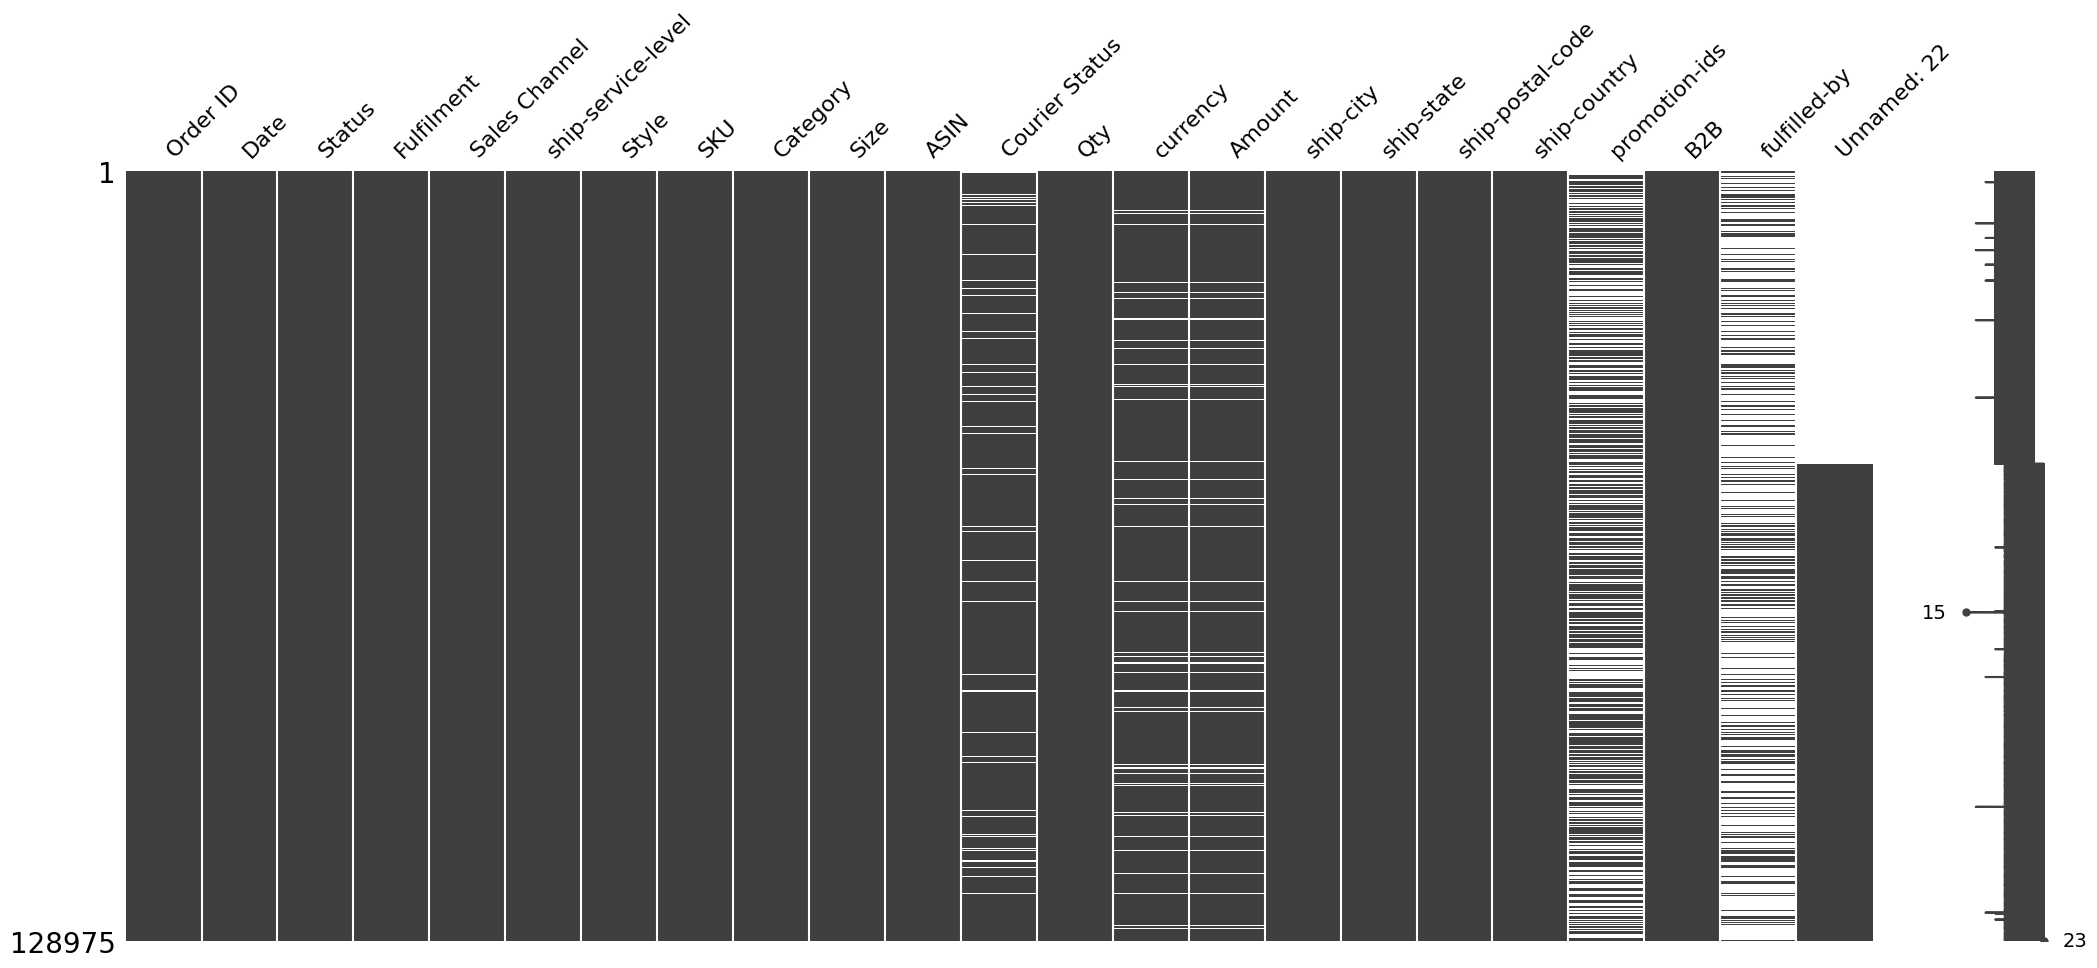

In [9]:
msno.matrix(df)

<Axes: >

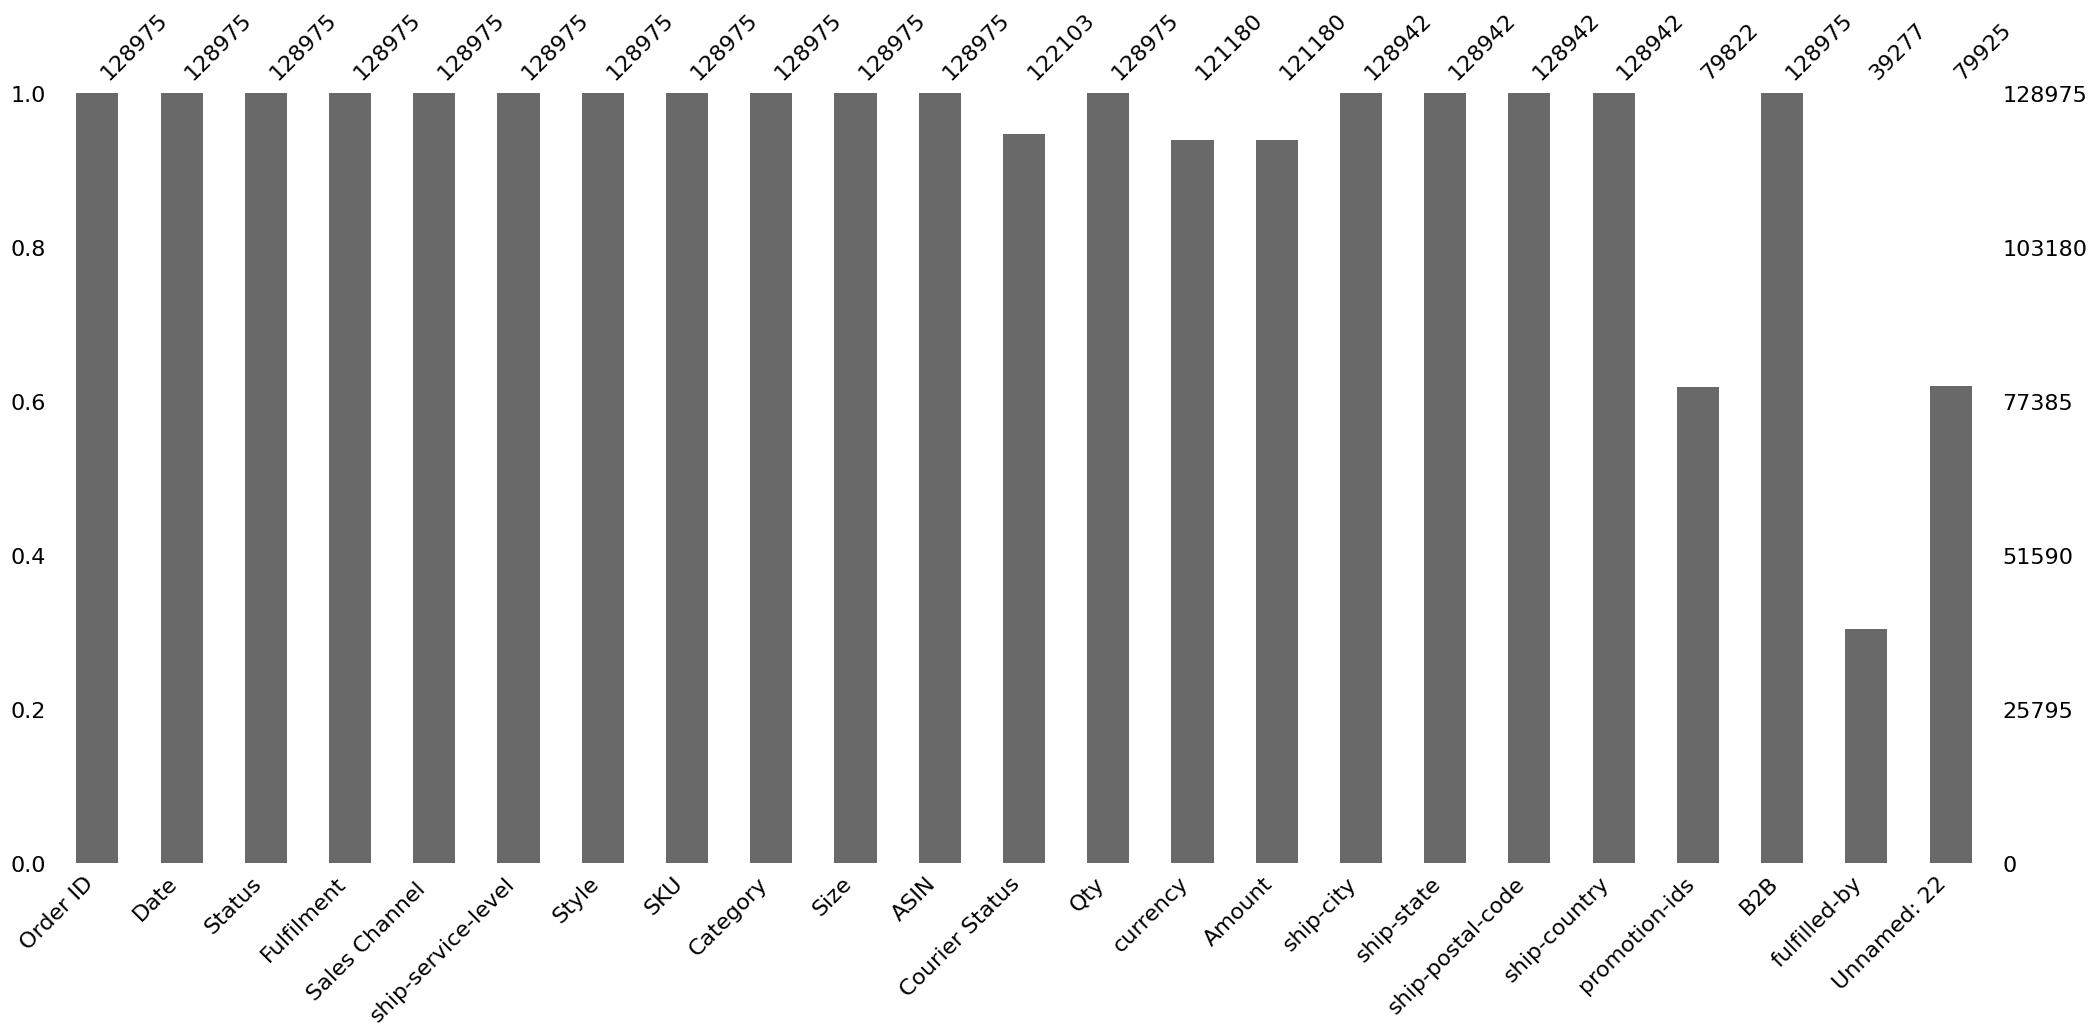

In [10]:
msno.bar(df)

<Axes: >

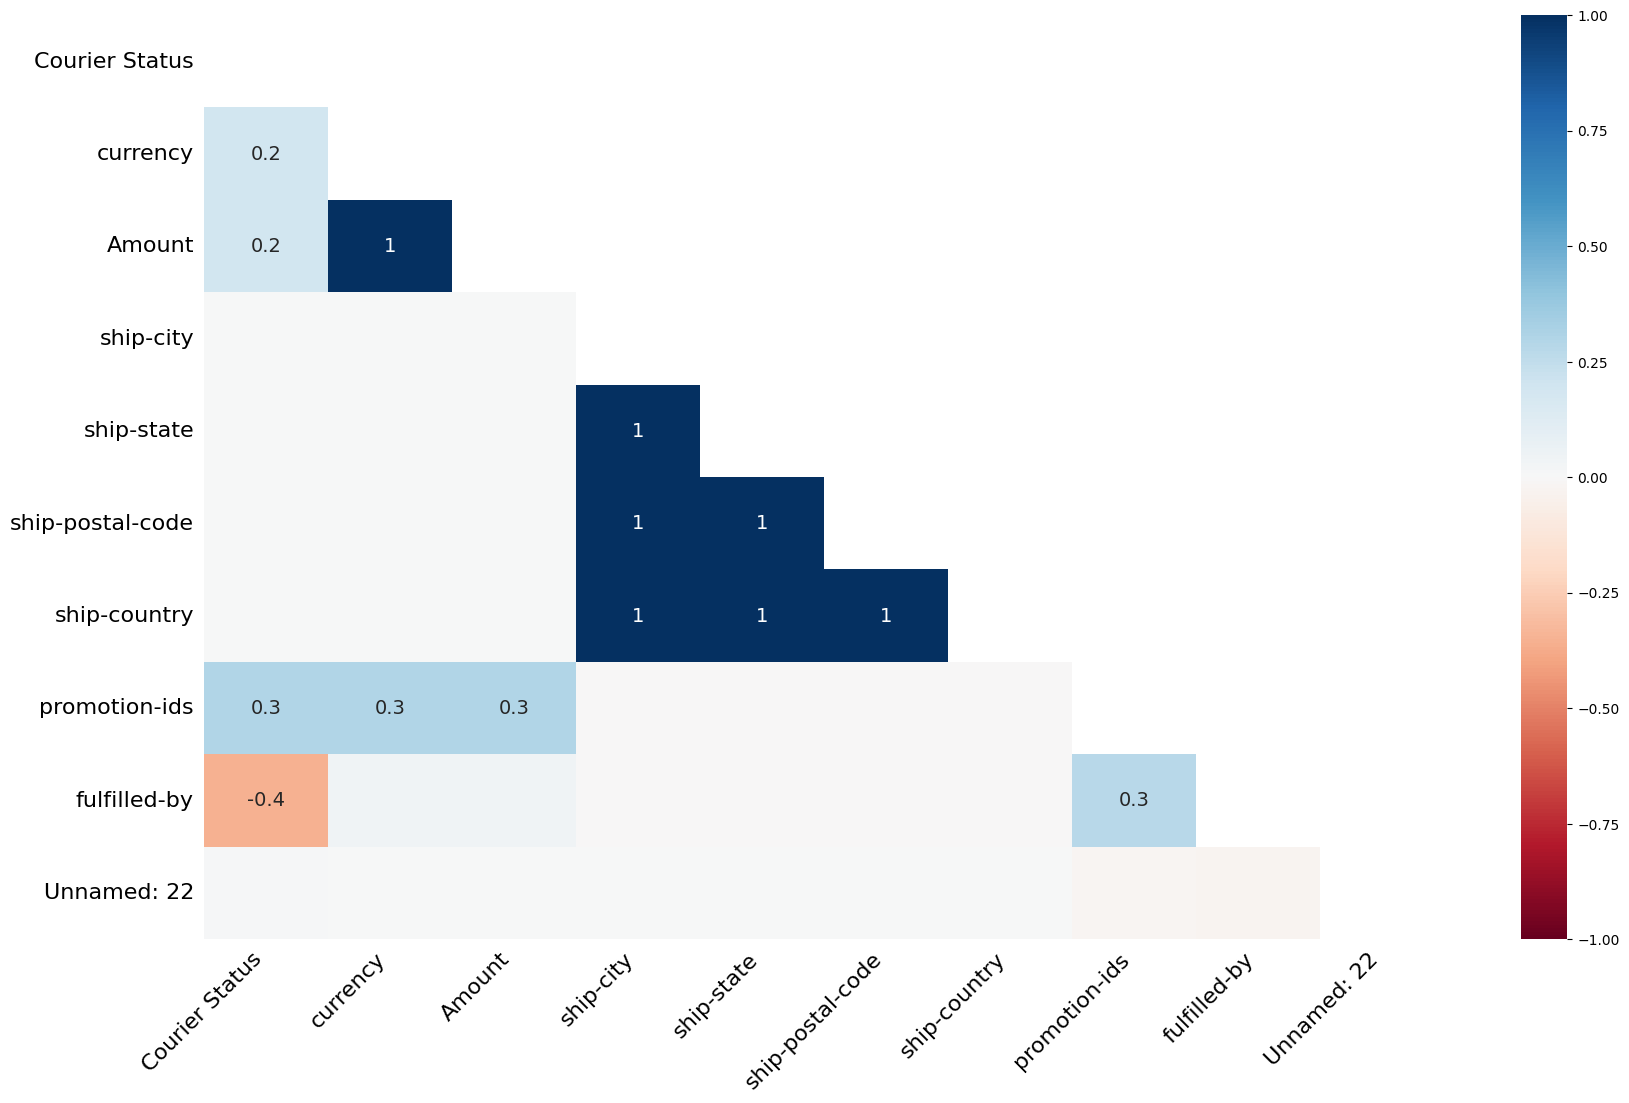

In [11]:
msno.heatmap(df)

In [12]:
df[df["Courier Status"].isnull()== True]["Status"].value_counts()

Status
Cancelled                       6861
Shipped - Delivered to Buyer       8
Shipped - Returned to Seller       3
Name: count, dtype: int64

In [13]:
df[df["promotion-ids"].isnull()== True]["fulfilled-by"].value_counts()

fulfilled-by
Easy Ship    6929
Name: count, dtype: int64

## Types of nullity

- Currency and Amount columns (MNAR)
- Ship_City, Ship_State, Ship_postal_code and Ship_Country (MNAR)
- Courier Status rows are null when fulfilled is easy ship (MAR)
- fulfilled-by rows are null when Fulfilment is Amazon (MAR)


## 2.Summary Statistics:

In [14]:
df.describe()

,Qty,Amount,ship-postal-code
count,128975.000000,121180.000000,128942.000000
mean,0.904431,648.561465,463966.236509
std,0.313354,281.211687,191476.764941
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [15]:
df.describe(include= "object")

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [16]:
df["B2B"].value_counts()

B2B
False    128104
True        871
Name: count, dtype: int64

In [17]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

In [18]:
num_cols = num_cols.to_list()

In [19]:
num_cols.remove('ship-postal-code')

In [20]:
num_cols

['Qty', 'Amount']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


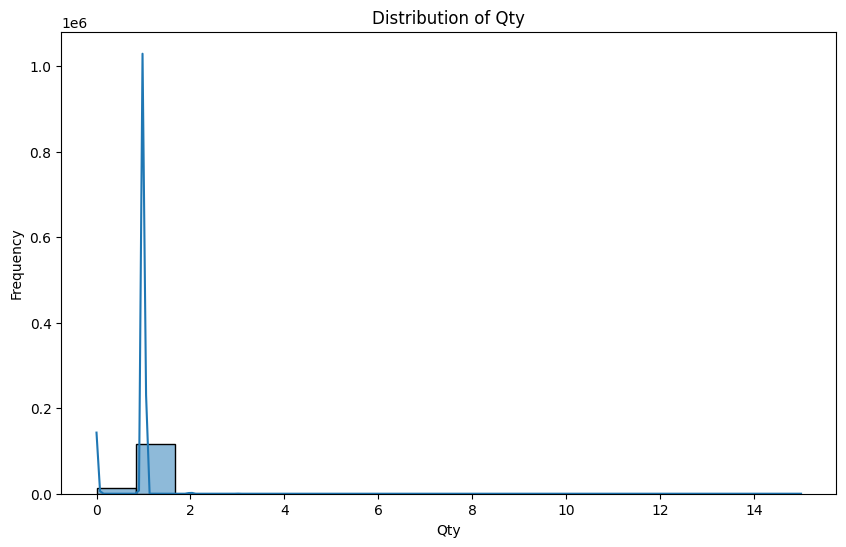

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


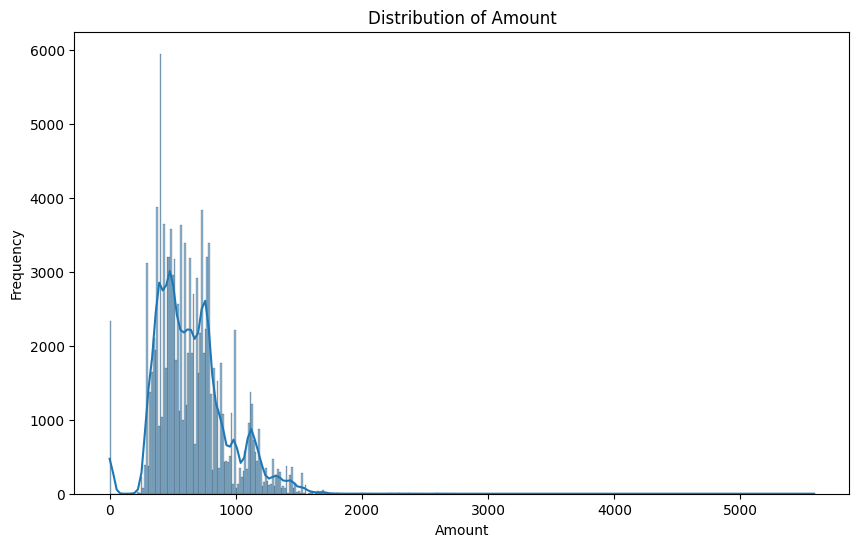

In [21]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

In [23]:
cat_cols = cat_cols.to_list()

In [24]:
cat_cols

['Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Courier Status',
 'currency',
 'ship-city',
 'ship-state',
 'ship-country',
 'promotion-ids',
 'B2B',
 'fulfilled-by',
 'Unnamed: 22']

In [25]:
df["Unnamed: 22"].value_counts()

Unnamed: 22
False    79925
Name: count, dtype: int64

In [26]:
remove_col = ['Order ID', 'Date', 'Style', 'SKU', 'ASIN','currency', 'ship-city', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22']

In [27]:
for c in remove_col: 
    cat_cols.remove(c)

In [28]:
cat_cols

['Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'ship-state',
 'B2B']

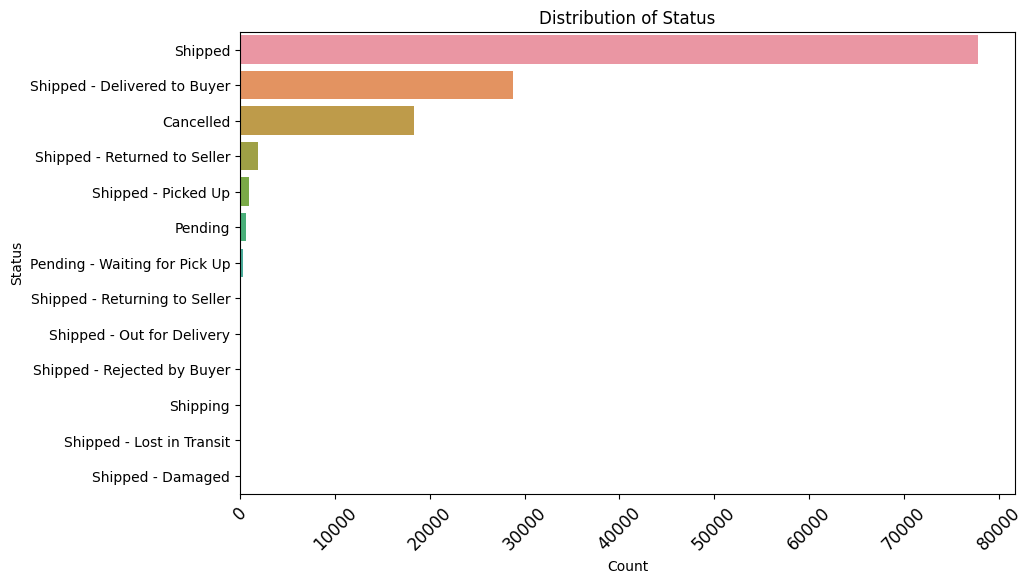

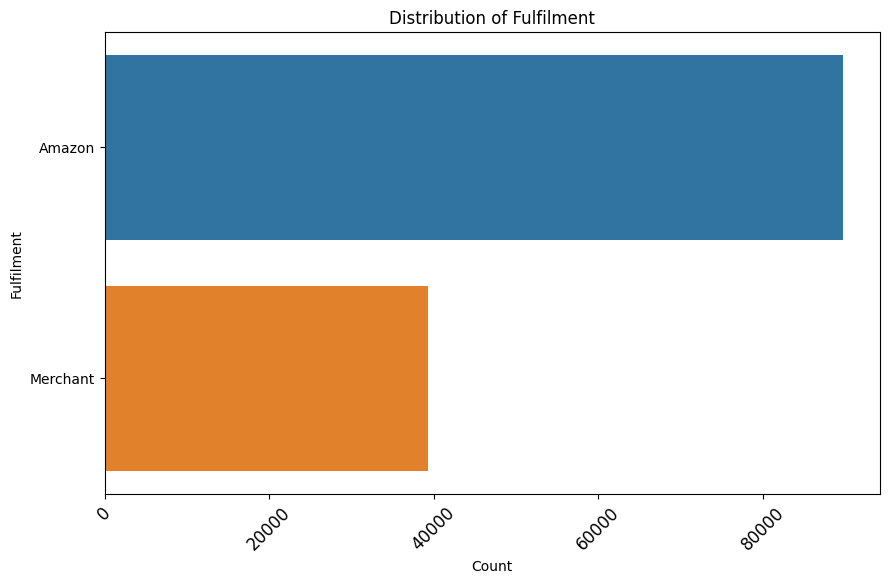

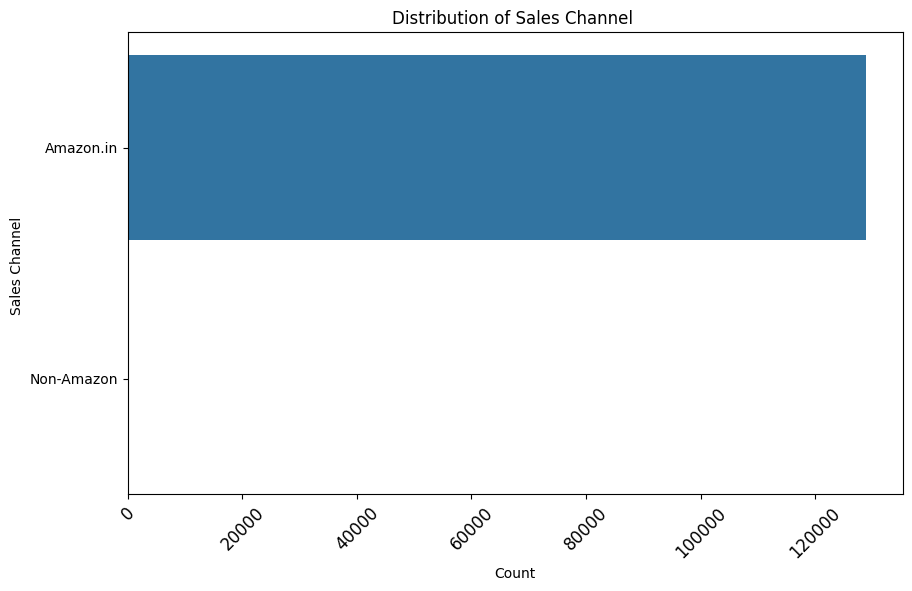

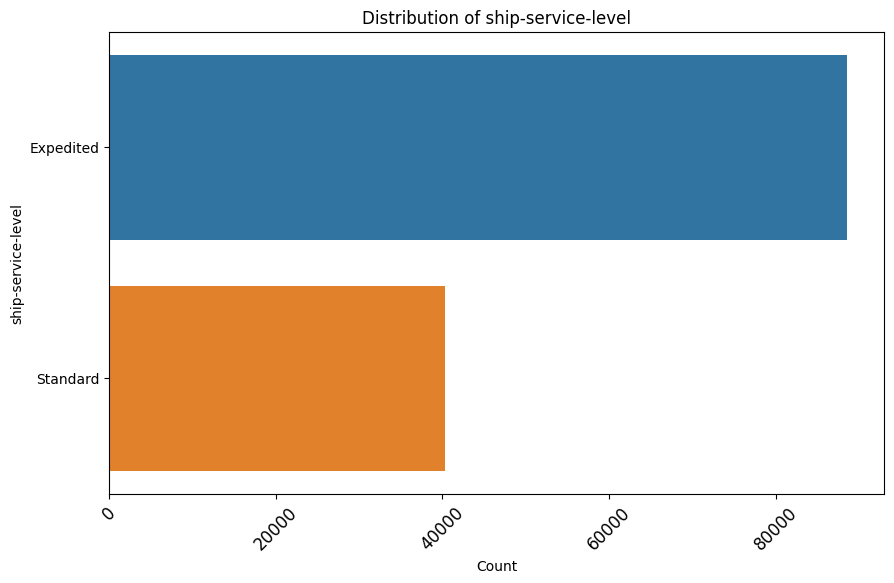

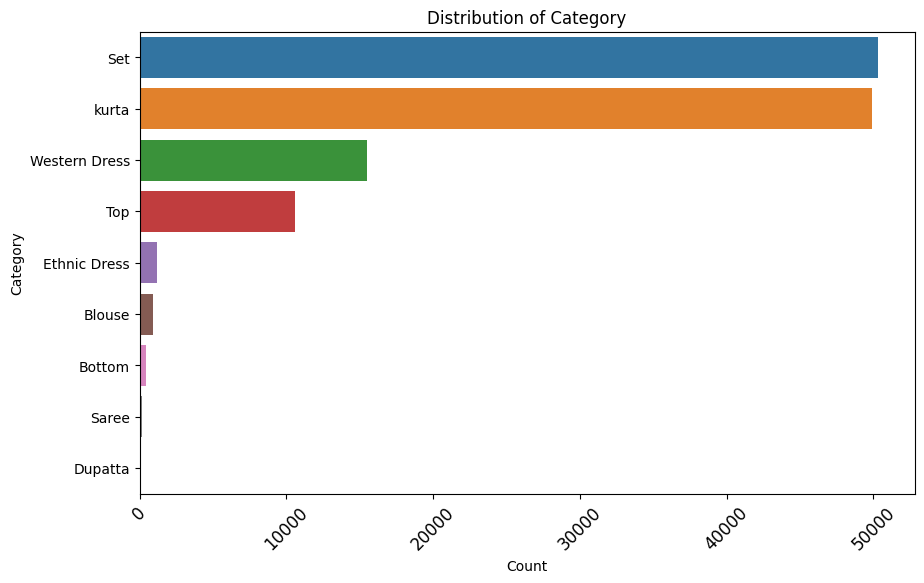

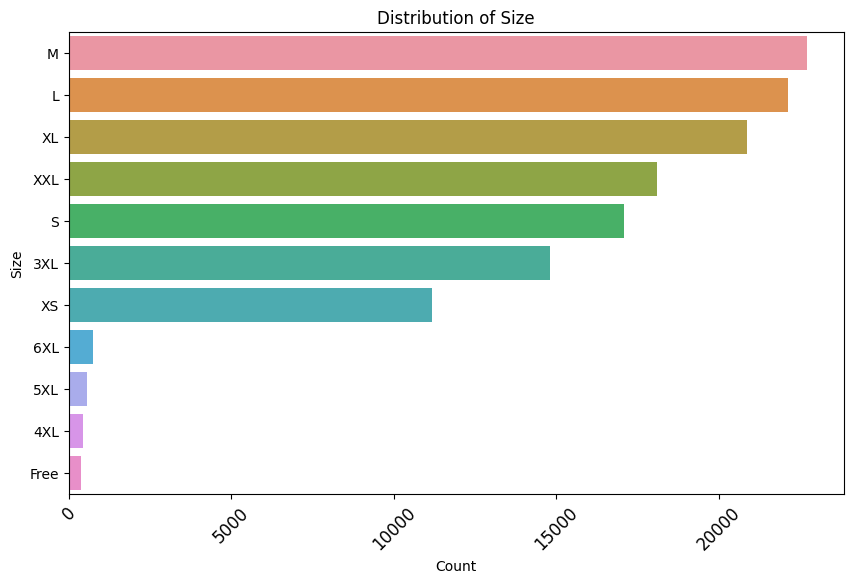

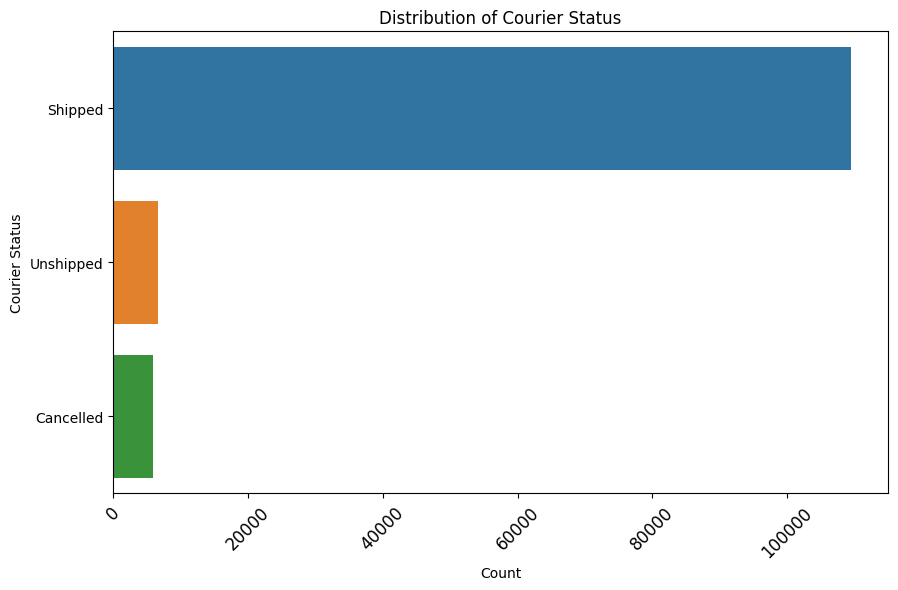

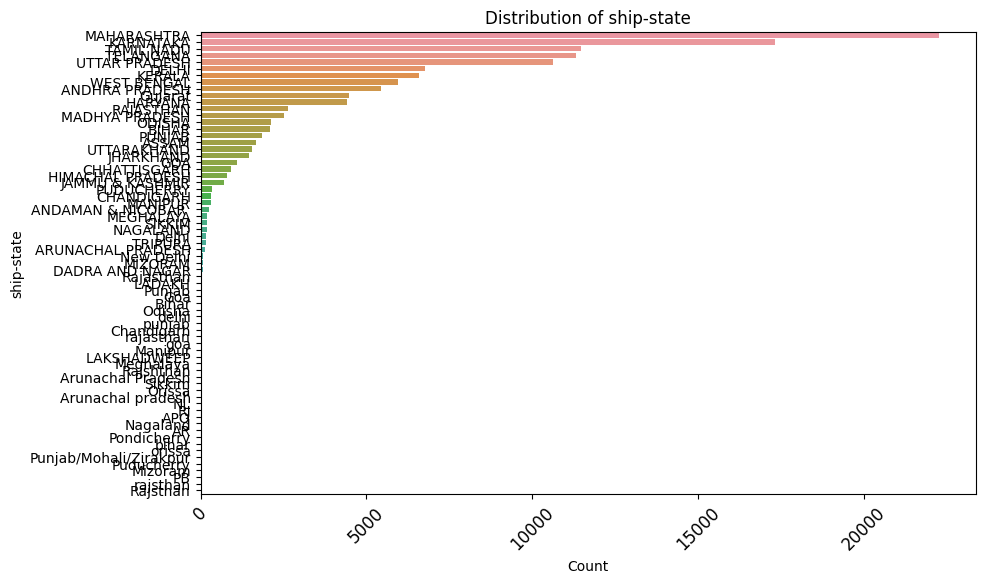

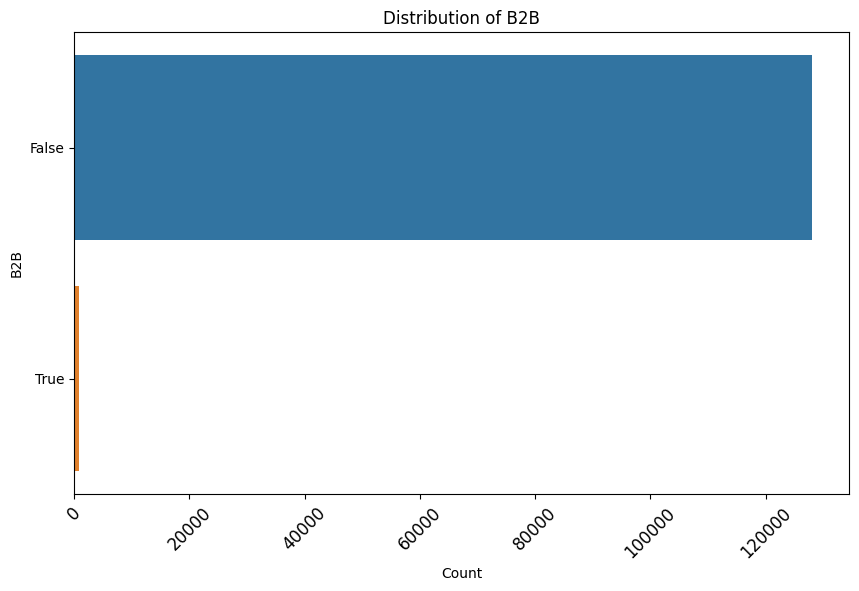

In [29]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=10)
    plt.show()

## Check Normality

In [30]:
import scipy.stats as stats


# Apply Kolmogorov-Smirnov test
ks_stat, ks_pvalue = stats.kstest(df["Qty"], 'norm', args=(0, 1))

# Print the results
print(f"Kolmogorov-Smirnov Test:\nStatistic: {ks_stat}, p-value: {ks_pvalue}\n")

# Interpretation
alpha = 0.05
if ks_pvalue > alpha:
    print("Fail to reject the null hypothesis - the data is normally distributed according to the Kolmogorov-Smirnov test.")
else:
    print("Reject the null hypothesis - the data is not normally distributed according to the Kolmogorov-Smirnov test.")


Kolmogorov-Smirnov Test:
Statistic: 0.7420464324418711, p-value: 0.0

Reject the null hypothesis - the data is not normally distributed according to the Kolmogorov-Smirnov test.


In [31]:
import scipy.stats as stats

# Apply Kolmogorov-Smirnov test
ks_stat, ks_pvalue = stats.kstest(df["Amount"].dropna(), 'norm', args=(0, 1))

# Print the results
print(f"Kolmogorov-Smirnov Test:\nStatistic: {ks_stat}, p-value: {ks_pvalue}\n")

# Interpretation
alpha = 0.05
if ks_pvalue > alpha:
    print("Fail to reject the null hypothesis - the data is normally distributed according to the Kolmogorov-Smirnov test.")
else:
    print("Reject the null hypothesis - the data is not normally distributed according to the Kolmogorov-Smirnov test.")


Kolmogorov-Smirnov Test:
Statistic: 0.9806651262584585, p-value: 0.0

Reject the null hypothesis - the data is not normally distributed according to the Kolmogorov-Smirnov test.


# Data Preprocessing

## 1. Handling Missing Values:

In [32]:
def extract_promotions(ids):
    try:    
        return ids.split(',')
    except:
        return "None"

In [33]:
df["promotion-ids"] = df["promotion-ids"].apply(extract_promotions)

In [34]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,[Amazon PLCC Free-Financing Universal Merchant...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,[IN Core Free Shipping 2015/04/08 23-48-5-108],True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,None,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,None,False,NaN,NaN


In [35]:
df[ df["Fulfilment"] == "Merchant"]["fulfilled-by"].value_counts()

fulfilled-by
Easy Ship    39277
Name: count, dtype: int64

In [36]:
df["Fulfilment"].value_counts()

Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

In [37]:
df["fulfilled-by"].fillna('Self_Ship', inplace= True)

/tmp/ipykernel_34/1905566916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fulfilled-by"].fillna('Self_Ship', inplace= True)


In [38]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids             0
B2B                       0
fulfilled-by              0
Unnamed: 22           49050
dtype: int64

In [39]:
df["Unnamed: 22"].fillna(True,inplace = True)

/tmp/ipykernel_34/2847996692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Unnamed: 22"].fillna(True,inplace = True)
/tmp/ipykernel_34/2847996692.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Unnamed: 22"].fillna(True,inplace = True)


In [40]:
filter_df = df[df["Courier Status"].isnull()== True]

In [41]:
filter_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,None,False,Easy Ship,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,None,False,Easy Ship,True
23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,...,INR,570.48,pune,MAHARASHTRA,411044.0,IN,None,False,Easy Ship,True
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,...,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,None,False,Easy Ship,True
83,404-6522553-9345930,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,M,...,INR,1105.36,DEHRADUN,UTTARAKHAND,248001.0,IN,None,False,Easy Ship,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128762,402-4651401-6366769,06-01-22,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,S,...,INR,385.71,BENGALURU,KARNATAKA,560043.0,IN,None,False,Easy Ship,False
128808,408-4182027-2307535,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3619,JNE3619-KR-S,kurta,S,...,NaN,NaN,BENGALURU,KARNATAKA,560092.0,IN,None,False,Easy Ship,False
128855,402-1958677-2521967,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-M,kurta,M,...,NaN,NaN,Cherukunnu (p.o),KERALA,670301.0,IN,None,False,Easy Ship,False


In [42]:
filter_df.index

Index([     0,      3,     23,     29,     83,    178,    226,    227,    250,
          251,
       ...
       128594, 128598, 128638, 128730, 128761, 128762, 128808, 128855, 128875,
       128890],
      dtype='int64', name='index', length=6872)

In [43]:
df["Courier Status"].value_counts()

Courier Status
Shipped      109487
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

In [44]:
def update_courier_status(row):
    if (row['Status'] == 'Cancelled') and pd.isnull(row['Courier Status']):
        return 'Unshipped'
    elif (row['Status'] in ['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller']) and pd.isnull(row['Courier Status']):
        return 'Shipped'
    return row['Courier Status']

# Apply the function to update the "Courier Status" column
df['Courier Status'] = df.apply(update_courier_status, axis=1)

In [45]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status           0
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
promotion-ids            0
B2B                      0
fulfilled-by             0
Unnamed: 22              0
dtype: int64

In [46]:
df2 = df.dropna()

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            121149 non-null  object 
 1   Date                121149 non-null  object 
 2   Status              121149 non-null  object 
 3   Fulfilment          121149 non-null  object 
 4   Sales Channel       121149 non-null  object 
 5   ship-service-level  121149 non-null  object 
 6   Style               121149 non-null  object 
 7   SKU                 121149 non-null  object 
 8   Category            121149 non-null  object 
 9   Size                121149 non-null  object 
 10  ASIN                121149 non-null  object 
 11  Courier Status      121149 non-null  object 
 12  Qty                 121149 non-null  int64  
 13  currency            121149 non-null  object 
 14  Amount              121149 non-null  float64
 15  ship-city           121149 non-null  ob

In [48]:
(df.shape[0] - df2.shape[0]) / df.shape[0] *100

6.067842605156038

## 2. Data Type Conversion:

In [49]:
df2["Date"] = pd.to_datetime(df2["Date"])

/tmp/ipykernel_34/2290790982.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["Date"] = pd.to_datetime(df2["Date"])
/tmp/ipykernel_34/2290790982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"] = pd.to_datetime(df2["Date"])


In [50]:
df2["ship-postal-code"] = df2["ship-postal-code"].astype('object')

/tmp/ipykernel_34/3256434642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ship-postal-code"] = df2["ship-postal-code"].astype('object')


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121149 non-null  object        
 1   Date                121149 non-null  datetime64[ns]
 2   Status              121149 non-null  object        
 3   Fulfilment          121149 non-null  object        
 4   Sales Channel       121149 non-null  object        
 5   ship-service-level  121149 non-null  object        
 6   Style               121149 non-null  object        
 7   SKU                 121149 non-null  object        
 8   Category            121149 non-null  object        
 9   Size                121149 non-null  object        
 10  ASIN                121149 non-null  object        
 11  Courier Status      121149 non-null  object        
 12  Qty                 121149 non-null  int64         
 13  currency            121149 non-nul

## 3. Outlier Detection and Treatment:

In [52]:
def calc_boundaries(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [53]:
qty_lower, qty_upper = calc_boundaries(df2["Qty"])

In [54]:
amount_lower, amount_upper = calc_boundaries(df2["Amount"])

In [55]:
qty_outliers = df2[(df2['Qty'] < qty_lower) | (df2['Qty'] > qty_upper)]

In [56]:
qty_outliers["Qty"].describe()

count    5512.000000
mean        0.148222
std         0.563175
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: Qty, dtype: float64

In [57]:
amount_outliers = df2[(df2['Amount'] < amount_lower) | (df2['Amount'] > amount_upper)]

In [58]:
amount_outliers["Amount"].describe()

count    3599.000000
mean     1435.615552
std       191.209017
min      1297.000000
25%      1338.000000
50%      1399.000000
75%      1473.000000
max      5584.000000
Name: Amount, dtype: float64

- we can keep this values as they can be true outliers not errors in data collection 

#  Data Visualization

In [59]:
df2['month'] = df2["Date"].dt.month
df2['day'] = df2["Date"].dt.day
df2['day_name'] = df2["Date"].dt.day_name()


/tmp/ipykernel_34/1614156128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2["Date"].dt.month
/tmp/ipykernel_34/1614156128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2["Date"].dt.day
/tmp/ipykernel_34/1614156128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [60]:
def num_promotions(p):
    if p == "None":
        return 0
    else:
        return len(p)

In [61]:
df2["num_promotions"] = df2["promotion-ids"].apply(num_promotions)

/tmp/ipykernel_34/188957330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["num_promotions"] = df2["promotion-ids"].apply(num_promotions)


In [62]:
df2.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,month,day,day_name,num_promotions
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,400081.0,IN,None,False,Easy Ship,True,4,30,Saturday,0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,560085.0,IN,[Amazon PLCC Free-Financing Universal Merchant...,False,Easy Ship,True,4,30,Saturday,25
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,410210.0,IN,[IN Core Free Shipping 2015/04/08 23-48-5-108],True,Self_Ship,True,4,30,Saturday,1
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,605008.0,IN,None,False,Easy Ship,True,4,30,Saturday,0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,600073.0,IN,None,False,Self_Ship,True,4,30,Saturday,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Count'>

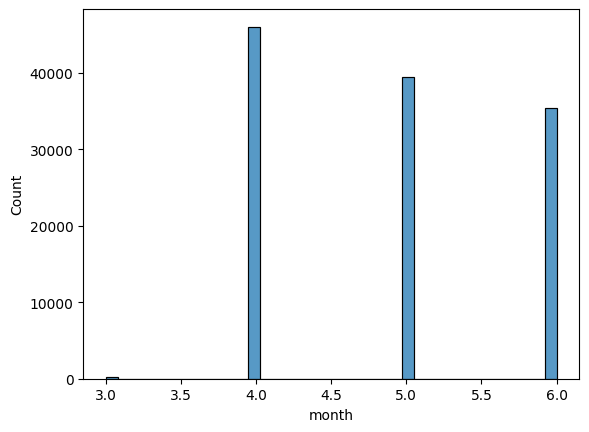

In [63]:
sns.histplot(x= df2["month"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day'>

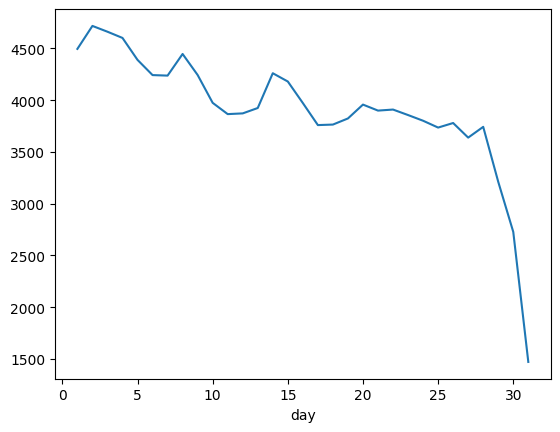

In [64]:
sns.lineplot(x= df2["day"].value_counts().index , y = df2["day"].value_counts().values)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_name'>

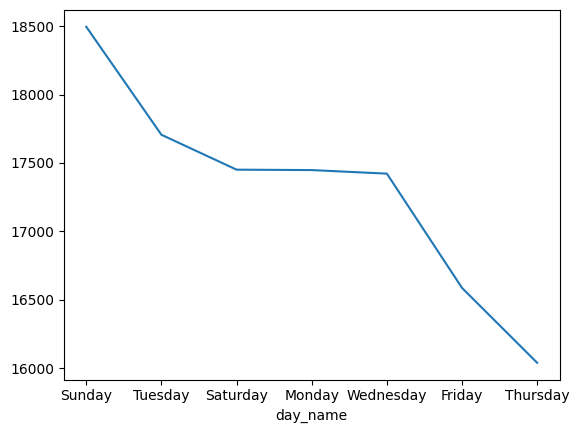

In [65]:
sns.lineplot(x= df2["day_name"].value_counts().index , y = df2["day_name"].value_counts().values)

<Axes: xlabel='month', ylabel='num_promotions'>

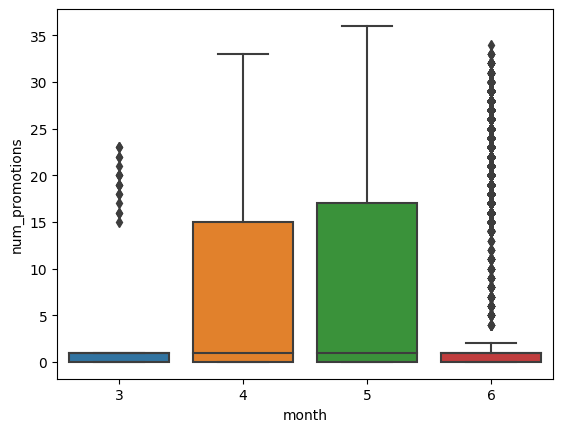

In [66]:
sns.boxplot(data= df2, x= 'month', y= 'num_promotions')

<Axes: xlabel='day', ylabel='num_promotions'>

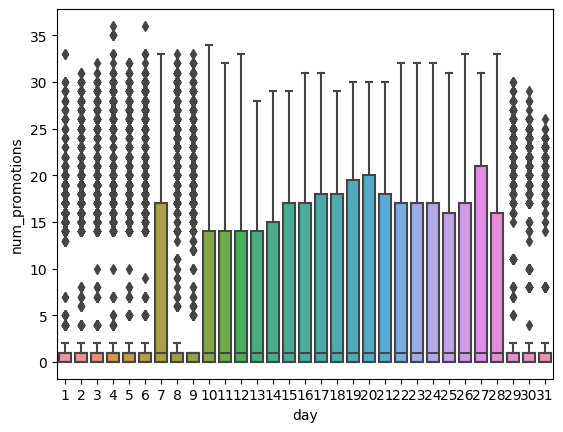

In [67]:
sns.boxplot(data= df2, x= 'day', y= 'num_promotions')

<Axes: xlabel='day_name', ylabel='num_promotions'>

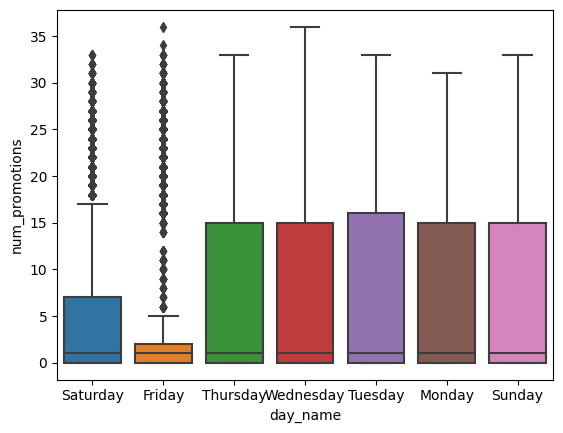

In [68]:
sns.boxplot(data= df2, x= 'day_name', y= 'num_promotions')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Status', ylabel='Count'>

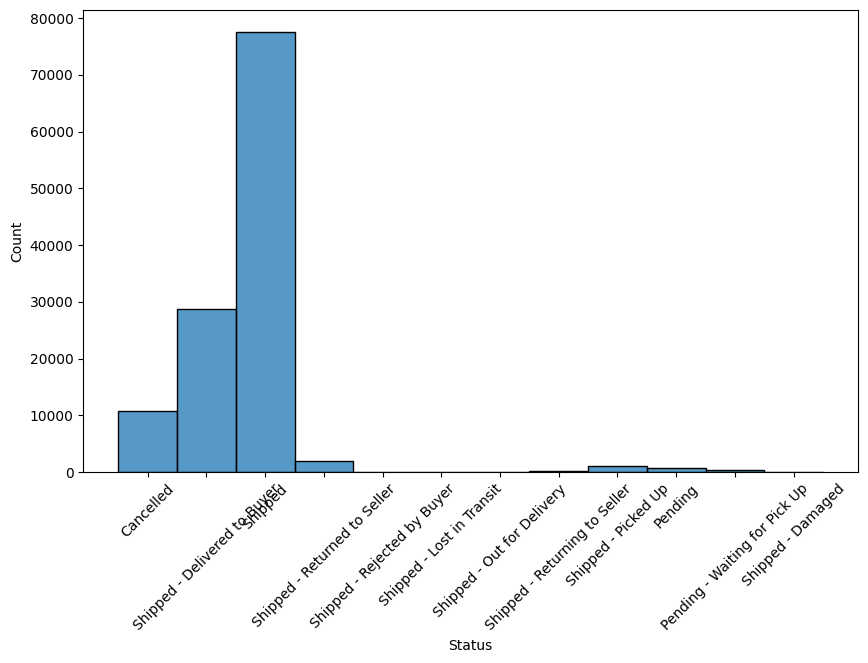

In [69]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10, rotation=45)
sns.histplot(x= df2["Status"])

In [70]:
df2["Status"].value_counts()

Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                        10761
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [71]:
def status_rel(columns, values, agg):
    table = pd.pivot_table(data= df2, index= "Status",columns= columns ,values= values, aggfunc=agg)
    print(sns.heatmap(table))

Axes(0.125,0.11;0.62x0.77)


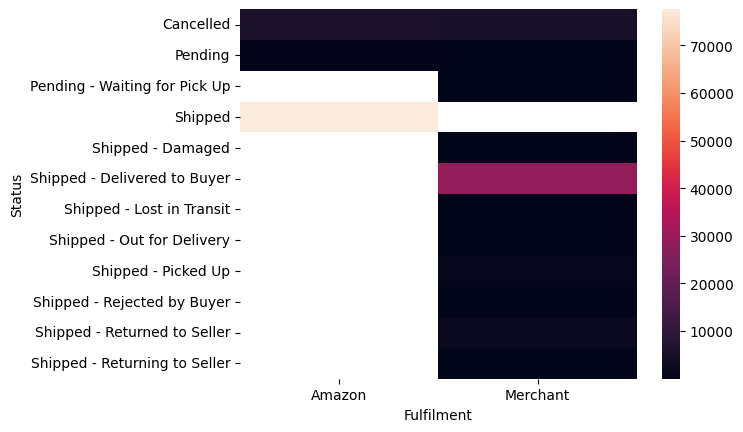

In [72]:
status_rel("Fulfilment", "day", "count")

Axes(0.125,0.11;0.62x0.77)


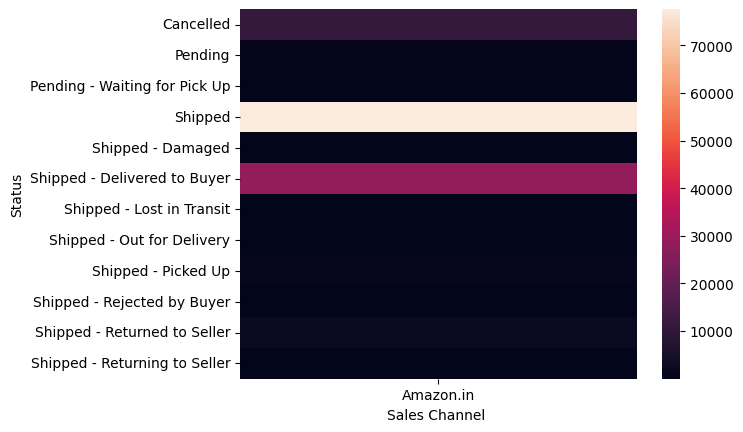

In [73]:
status_rel("Sales Channel ", "day", "count")

In [74]:
df2["Sales Channel "].value_counts()

Sales Channel 
Amazon.in    121149
Name: count, dtype: int64

Axes(0.125,0.11;0.62x0.77)


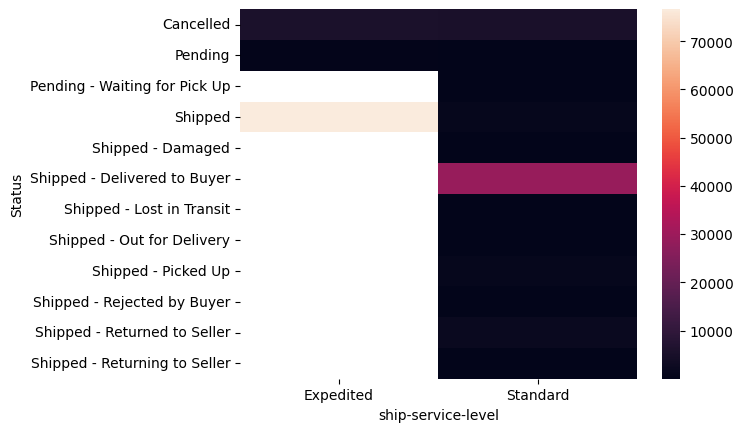

In [75]:
status_rel("ship-service-level", "day", "count")

Axes(0.125,0.11;0.62x0.77)


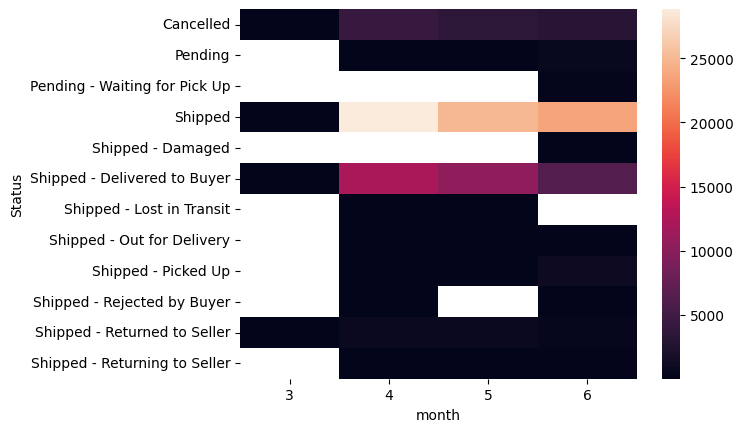

In [76]:
status_rel("month", "day", "count")

Axes(0.125,0.11;0.62x0.77)


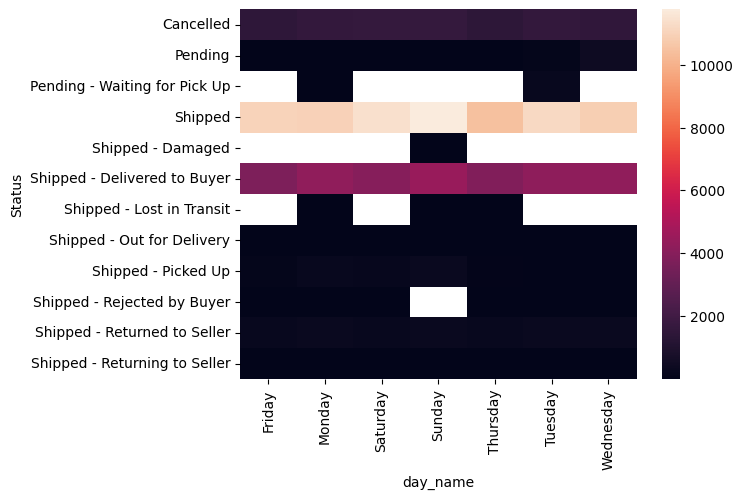

In [77]:
status_rel("day_name", "day", "count")

In [78]:
 df2["Style"].value_counts()

Style
JNE3797    3994
JNE3405    2102
J0230      1732
SET268     1732
J0341      1538
           ... 
SET026        1
SAR149        1
SAR030        1
J0053         1
SET019        1
Name: count, Length: 1373, dtype: int64

In [79]:
df2["SKU"].value_counts()

SKU
JNE3797-KR-L      722
JNE3797-KR-M      620
JNE3797-KR-S      553
JNE3405-KR-L      483
J0230-SKD-M       472
                 ... 
JNE3788-KR-L        1
CH209-BIEGE-L       1
SAR148              1
BL085-S             1
SET266-KR-NP-S      1
Name: count, Length: 7157, dtype: int64

Axes(0.125,0.11;0.62x0.77)


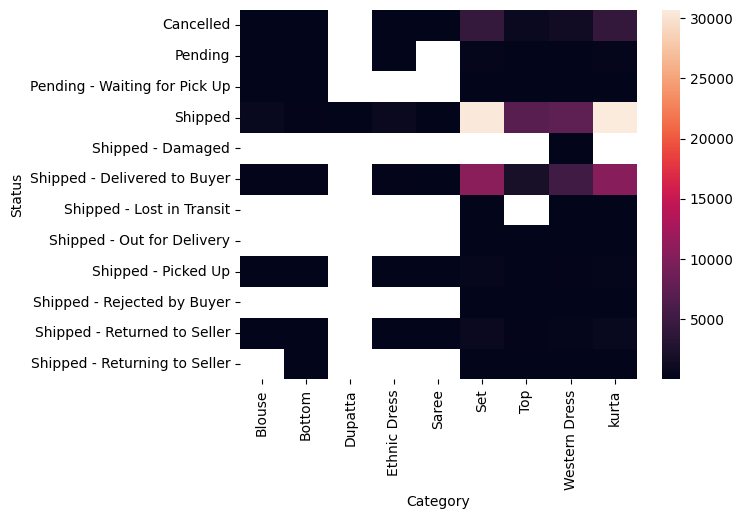

In [80]:
status_rel("Category", "day", "count")

Axes(0.125,0.11;0.62x0.77)


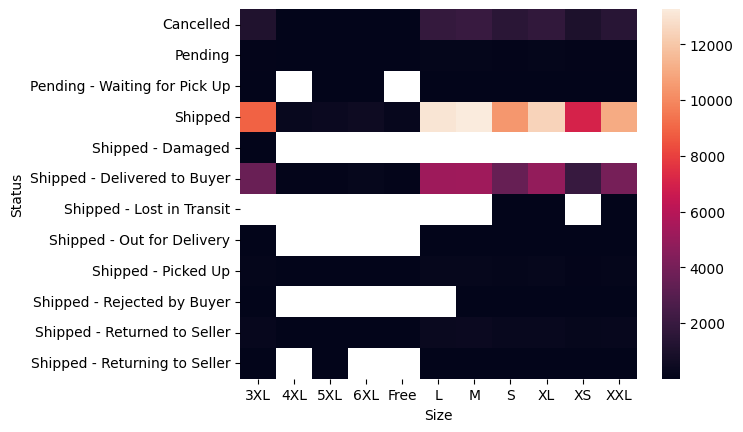

In [81]:
status_rel("Size", "day", "count")

In [82]:
df2["ASIN"].value_counts()

ASIN
B09SDXFFQ1    722
B09SDY8DCT    620
B09SDYQ3WG    553
B081WSCKPQ    483
B08XNJG8B1    472
             ... 
B09B2WM5BF      1
B08BFVCL5S      1
B09TZYD7V2      1
B09HMXWN3N      1
B09LV24ZPD      1
Name: count, Length: 7153, dtype: int64

Axes(0.125,0.11;0.62x0.77)


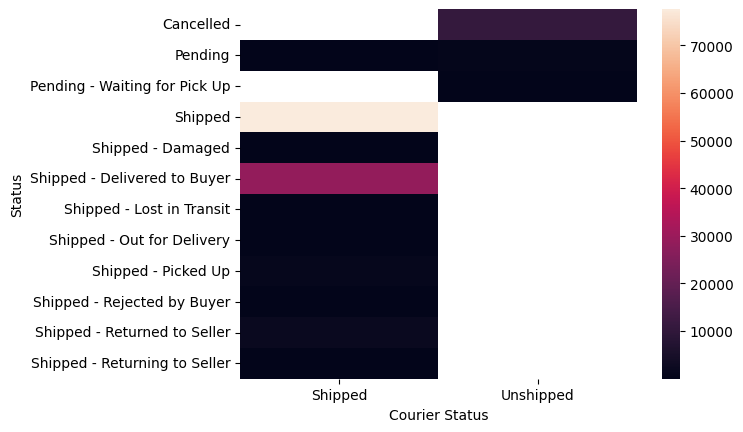

In [83]:
status_rel("Courier Status", "day", "count")

<Axes: xlabel='Status', ylabel='Qty'>

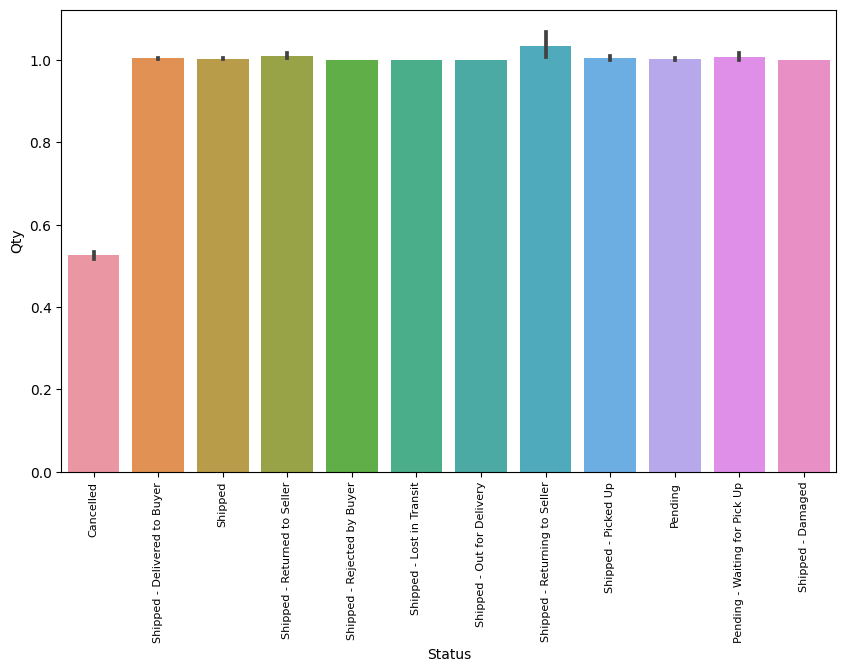

In [84]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=8, rotation=90)
sns.barplot(data= df2, x= "Status", y= "Qty")

<Axes: xlabel='Status', ylabel='Amount'>

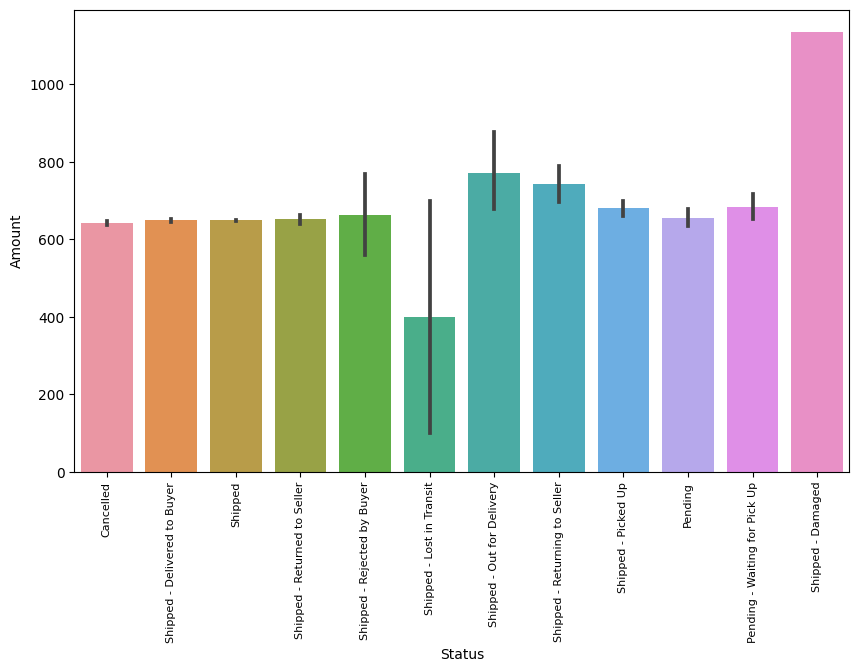

In [85]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=8, rotation=90)
sns.barplot(data= df2, x= "Status", y= "Amount")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Qty', ylabel='Amount'>

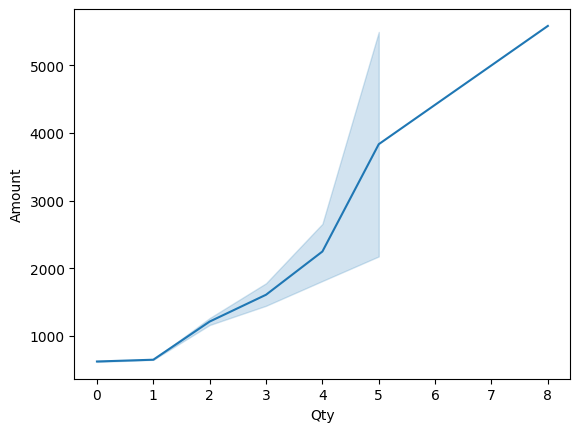

In [86]:
sns.lineplot(data= df2, x= "Qty", y= "Amount")

Axes(0.125,0.11;0.62x0.77)


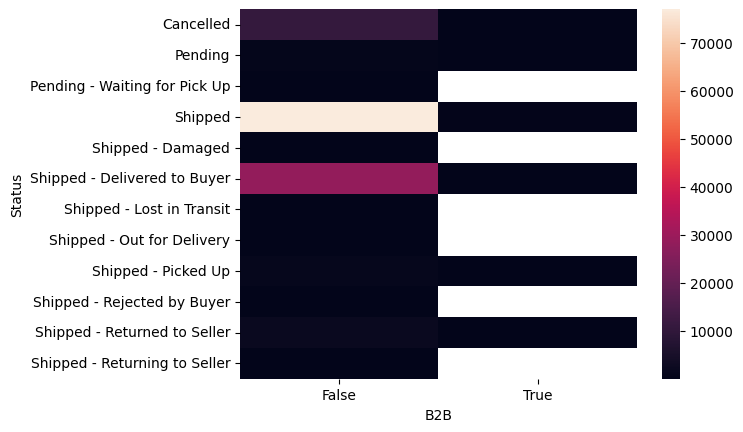

In [87]:
status_rel("B2B", "day", "count")

Axes(0.125,0.11;0.62x0.77)


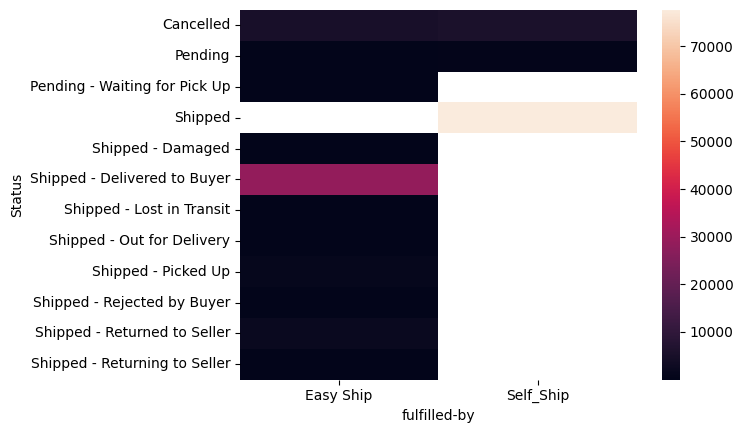

In [88]:
status_rel("fulfilled-by", "day", "count")

Axes(0.125,0.11;0.62x0.77)


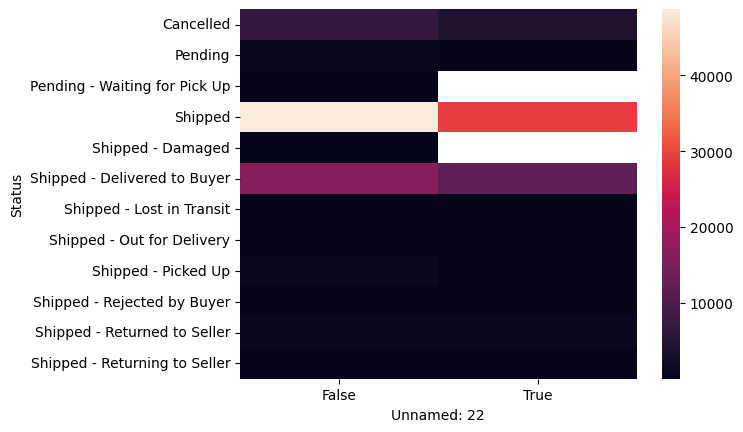

In [89]:
status_rel("Unnamed: 22", "day", "count")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_promotions', ylabel='Amount'>

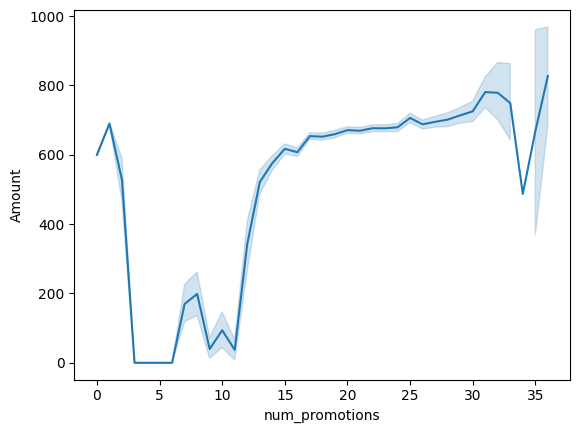

In [90]:
sns.lineplot(data= df2, x= "num_promotions", y= "Amount")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_promotions', ylabel='Qty'>

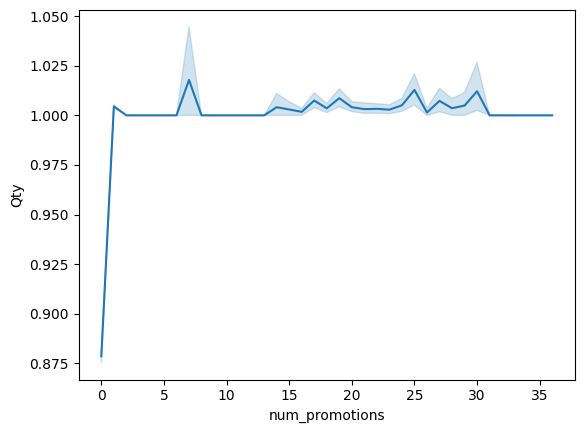

In [91]:
sns.lineplot(data= df2, x= "num_promotions", y= "Qty")

## Visual Analysis:


### ○ Visualize sales trends over time (e.g., monthly sales trends)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Amount'>

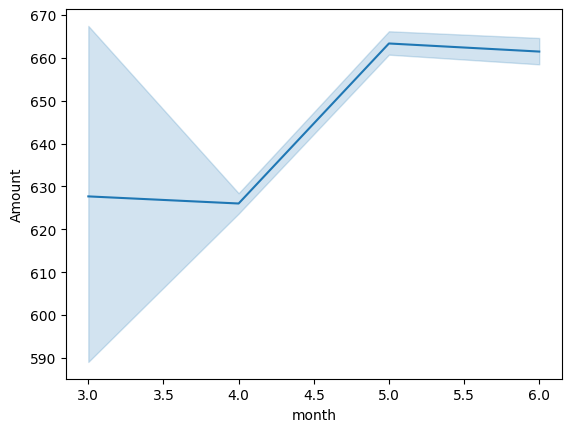

In [92]:
sns.lineplot(data= df2, x= "month", y= "Amount")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Qty'>

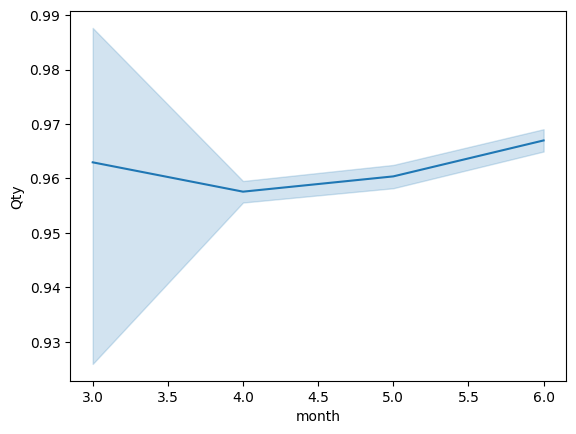

In [93]:
sns.lineplot(data= df2, x= "month", y= "Qty")

### ○ Identify top-selling products and categories using bar plots

<Axes: xlabel='Category', ylabel='count'>

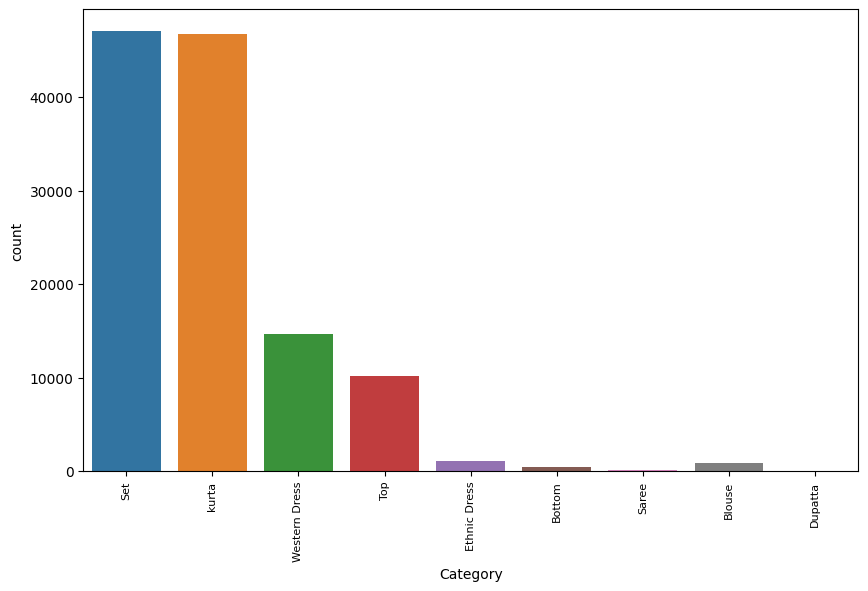

In [94]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=8, rotation=90)
sns.countplot(data= df2, x="Category")

### ○ Analyze regional sales distributions using geographical visualizations.

In [95]:
data = df2[["Amount", "ship-state"]]

In [96]:
import geopandas as gpd

Grouped DataFrame:
             ship-state      Amount
0   ANDAMAN & NICOBAR    158723.62
1       ANDHRA PRADESH  3219831.72
2                   AR      493.00
3    ARUNACHAL PRADESH    95235.00
4                ASSAM  1018136.20
..                 ...         ...
63                 goa     2467.00
64              orissa      597.00
65              punjab     8622.00
66           rajasthan     3946.00
67            rajsthan      521.00

[68 rows x 2 columns]
Indian States GeoDataFrame columns:
 Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
Regions in sales data not found in GeoDataFrame:
                 ship-state      Amount
0       andaman & nicobar    158723.62
1           andhra pradesh  3219831.72
2                       ar      493.00
3        arunachal pradesh    95235.00
5        arunachal pradesh     1935.00
6        arunachal pradesh      602.00
12         da

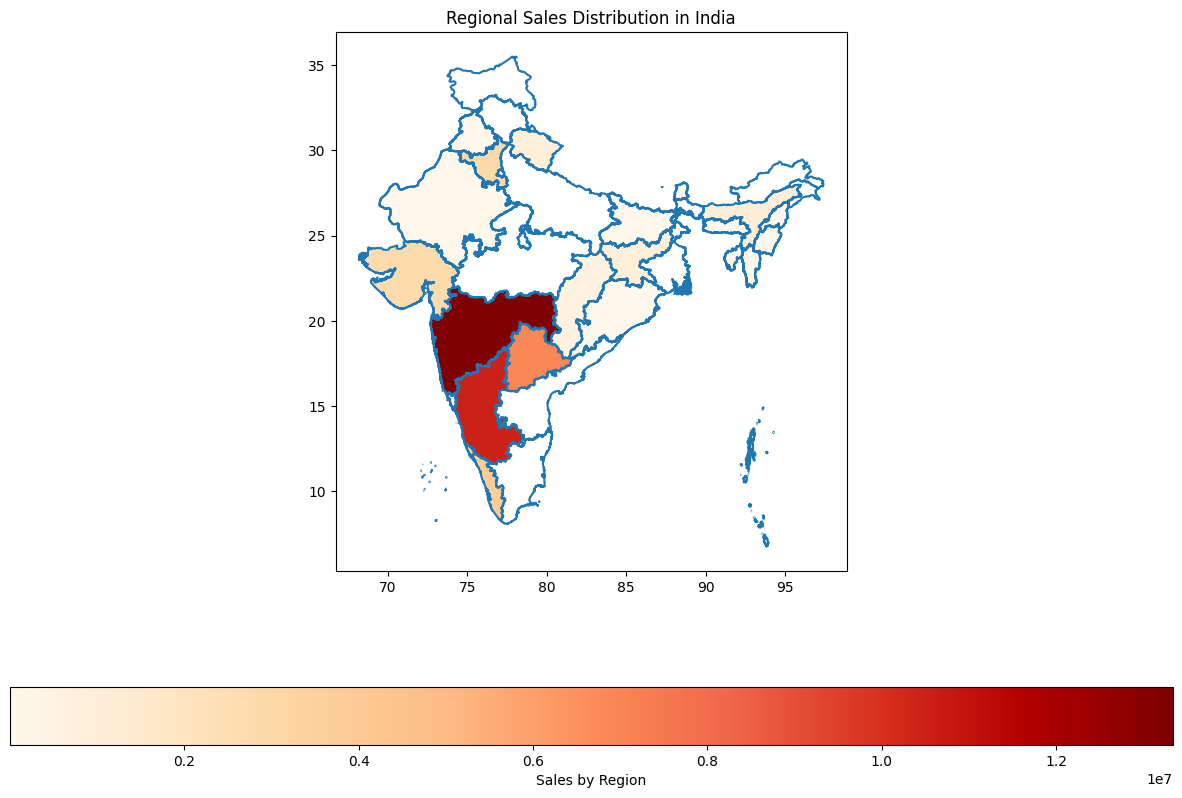

In [97]:

# Data Aggregation (Group by region and sum sales)
grouped_df = data.groupby("ship-state").sum().reset_index()
print("Grouped DataFrame:\n", grouped_df)

# Geographical Mapping
# Load the Indian states shapefile using an absolute path
shapefile_path = '/kaggle/input/india-shapefile/gadm41_IND_1.json'
india_states = gpd.read_file(shapefile_path)

# Debug information to ensure the GeoDataFrame is loaded correctly
print("Indian States GeoDataFrame columns:\n", india_states.columns)

# Standardize the region names
grouped_df['ship-state'] = grouped_df['ship-state'].str.lower()
india_states['NAME_1'] = india_states['NAME_1'].str.lower()

# Check for regions in sales data not present in the GeoDataFrame
missing_regions = grouped_df[~grouped_df['ship-state'].isin(india_states['NAME_1'])]
if not missing_regions.empty:
    print("Regions in sales data not found in GeoDataFrame:\n", missing_regions)

# Merge the sales data with the map
india_sales = india_states.merge(grouped_df, left_on='NAME_1', right_on='ship-state', how='left')
print("Merged GeoDataFrame:\n", india_sales)

# Check for missing values in the merged GeoDataFrame
if india_sales['Amount'].isnull().any():
    print("Missing sales data for some regions after merging.")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
india_sales.boundary.plot(ax=ax)
india_sales.plot(column='Amount', ax=ax, legend=True,
                 legend_kwds={'label': "Sales by Region",
                              'orientation': "horizontal"},
                 cmap='OrRd')

plt.title('Regional Sales Distribution in India')
plt.show()


In [98]:
grouped_df.sort_values(by= "Amount")

,ship-state,Amount
41,pb,399.00
52,rajsthan,443.00
2,ar,493.00
67,rajsthan,521.00
44,pondicherry,529.00
...,...,...
55,tamil nadu,6515650.11
58,uttar pradesh,6816642.08
56,telangana,6916615.65
22,karnataka,10481114.37


#  Predictive Modeling

## Building Predictive Models:

## Feature Selection

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121149 non-null  object        
 1   Date                121149 non-null  datetime64[ns]
 2   Status              121149 non-null  object        
 3   Fulfilment          121149 non-null  object        
 4   Sales Channel       121149 non-null  object        
 5   ship-service-level  121149 non-null  object        
 6   Style               121149 non-null  object        
 7   SKU                 121149 non-null  object        
 8   Category            121149 non-null  object        
 9   Size                121149 non-null  object        
 10  ASIN                121149 non-null  object        
 11  Courier Status      121149 non-null  object        
 12  Qty                 121149 non-null  int64         
 13  currency            121149 non-nul

### Univariate & High dimensional

In [100]:
data_model = df2.drop(columns=["Order ID", "Sales Channel ","Style", "SKU", "ASIN", "currency", "ship-city","ship-postal-code", "ship-country", "promotion-ids","Courier Status"])

In [101]:
data_model

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-state,B2B,fulfilled-by,Unnamed: 22,month,day,day_name,num_promotions
index,,,,,,,,,,,,,,,,
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,0,647.62,MAHARASHTRA,False,Easy Ship,True,4,30,Saturday,0
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.00,KARNATAKA,False,Easy Ship,True,4,30,Saturday,25
2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,1,329.00,MAHARASHTRA,True,Self_Ship,True,4,30,Saturday,1
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,0,753.33,PUDUCHERRY,False,Easy Ship,True,4,30,Saturday,0
4,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,1,574.00,TAMIL NADU,False,Self_Ship,True,4,30,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Shipped,Amazon,Expedited,kurta,XL,1,517.00,TELANGANA,False,Self_Ship,False,5,31,Tuesday,0
128971,2022-05-31,Shipped,Amazon,Expedited,Set,M,1,999.00,HARYANA,False,Self_Ship,False,5,31,Tuesday,1
128972,2022-05-31,Shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,TELANGANA,False,Self_Ship,False,5,31,Tuesday,0


In [102]:
data_model["Status"].value_counts()

Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                        10761
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [103]:
problem_list = ["Shipped - Returning to Seller", "Shipped - Out for Delivery", "Shipped - Rejected by Buyer", "Shipped - Lost in Transit","Shipped - Damaged"]
def merge_classes(c):
    if c in problem_list:
        return "problem after shipped"
    else:
        return c

In [104]:
data_model["Status"] = data_model["Status"].apply(merge_classes)

In [105]:
data_model["Status"].value_counts()

Status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                        10761
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
problem after shipped              197
Name: count, dtype: int64

In [106]:
state_df = pd.DataFrame(df["ship-state"].value_counts())

In [107]:
def merge_state(s):   
    if s in state_df[state_df["count"]<20].index.to_list():
        return "Other"
    else:
        return s

In [108]:
data_model["ship-state"] = data_model["ship-state"].apply(merge_state)

In [109]:
data_model["ship-state"].value_counts()

ship-state
MAHARASHTRA           21073
KARNATAKA             16394
TAMIL NADU            10809
TELANGANA             10637
UTTAR PRADESH          9947
DELHI                  6393
KERALA                 6151
WEST BENGAL            5547
ANDHRA PRADESH         5055
HARYANA                4188
Gujarat                4153
RAJASTHAN              2468
MADHYA PRADESH         2367
ODISHA                 1975
BIHAR                  1935
PUNJAB                 1760
ASSAM                  1548
UTTARAKHAND            1445
JHARKHAND              1352
GOA                    1048
CHHATTISGARH            864
HIMACHAL PRADESH        724
JAMMU & KASHMIR         649
PUDUCHERRY              325
CHANDIGARH              307
MANIPUR                 296
ANDAMAN & NICOBAR       243
MEGHALAYA               195
SIKKIM                  187
NAGALAND                179
Delhi                   156
TRIPURA                 141
ARUNACHAL PRADESH       134
New Delhi                75
Other                    73
MIZORAM  

### Feature Engennering

- we used Date column to extract month, day and day name

- As we used Fulfilment column to fill null values in fulfilled-by so it is highly correlated

In [110]:
data_model.drop(columns=["Date", "fulfilled-by"], inplace = True)

## Split data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
y = data_model["Status"]
X = data_model.drop(columns=["Status"])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,shuffle= True, random_state = 0, stratify=y)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(96919, 13)
(24230, 13)
(96919,)
(24230,)


In [115]:
print([y_train])

[index
82952                          Shipped
4184      Shipped - Delivered to Buyer
980       Shipped - Delivered to Buyer
22960                          Shipped
2020      Shipped - Delivered to Buyer
                      ...             
33297     Shipped - Delivered to Buyer
43690                          Shipped
80179                          Shipped
122259    Shipped - Delivered to Buyer
117614                       Cancelled
Name: Status, Length: 96919, dtype: object]


## Mapping Data

In [116]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [117]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Assuming y_train and y_test are already defined
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))  # Fit the encoder on the training data
y_test_encoded = encoder.transform(y_test.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [118]:
y_train_encoded

array([3, 4, 4, ..., 3, 4, 0])

In [119]:
col_list = X.select_dtypes('object').columns.tolist()

In [120]:
col_list.extend(['B2B', 'Unnamed: 22'])

In [121]:
col_list

['Fulfilment',
 'ship-service-level',
 'Category',
 'Size',
 'ship-state',
 'day_name',
 'B2B',
 'Unnamed: 22']

## correlation

In [122]:
corr = data_model[["Qty","Amount","num_promotions"]].corr()

<Axes: >

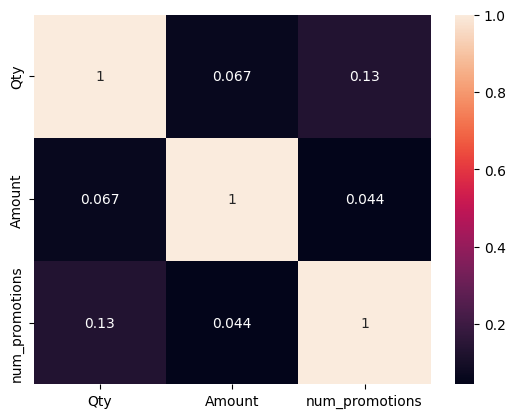

In [123]:
sns.heatmap(corr, annot= True)

## Build pipeline

In [124]:
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')



# Define preprocessing for categorical features
categorical_features = col_list
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop = 'first', handle_unknown ='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver= "saga", multi_class='multinomial'))
])

# Define parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 1.0],  # Regularization parameter
    'classifier__penalty': ['l1','l2'],  # Penalty norm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

# Best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 3.0min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 2.8min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 2.7min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 2.7min
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time= 2.8min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.2min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.1min
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time= 1.1min
[CV] END ..........classifier__C=1.0, classifier__penalty=l1; total time= 4.4min
[CV] END ..........classifier__C=1.0, classifier_

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Define preprocessing for categorical features
categorical_features = col_list
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop = 'first', handle_unknown ='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grid for grid search
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

# Additional evaluation metrics
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))

# Best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.49      0.65      2152
           1       0.66      0.60      0.63       131
           2       0.91      0.86      0.88        56
           3       0.93      1.00      0.96     15516
           4       0.93      0.99      0.96      5751
           5       0.86      0.87      0.87       195
           6       0.23      0.01      0.01       390
           7       0.33      0.03      0.05        39

    accuracy                           0.93     24230
   macro avg       0.73      0.61      0.63     24230
weighted avg       0.92      0.93      0.92     24230

Accuracy Score: 0.9300866694180767
Best parameters found:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best cross-validation score:
0.9299518115710358


# Dashboard Development

In [126]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 28.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.6 MB/s eta 0:00:00


2024-06-24 12:38:50.122 
  command:

    streamlit run /opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


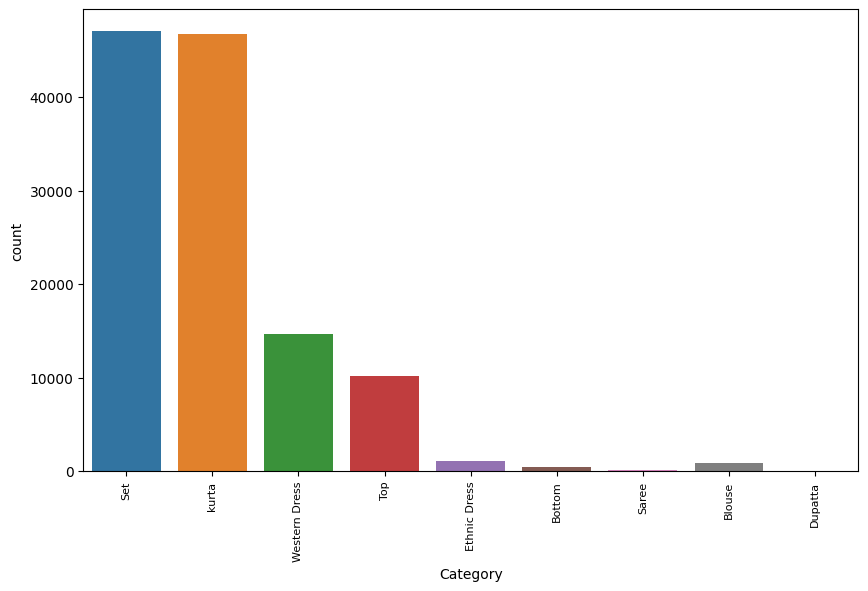

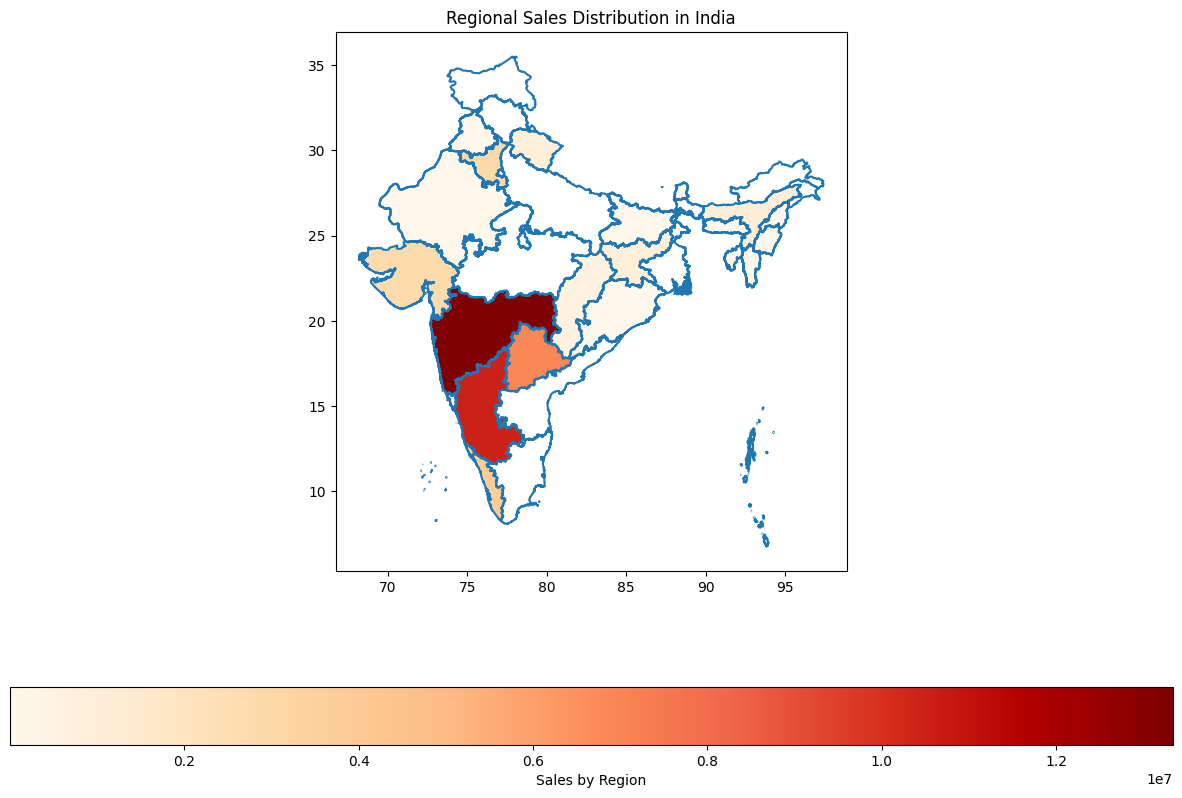

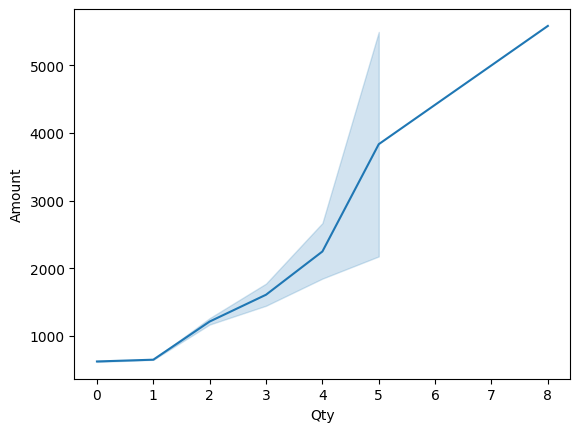

Axes(0.125,0.11;0.62x0.77)


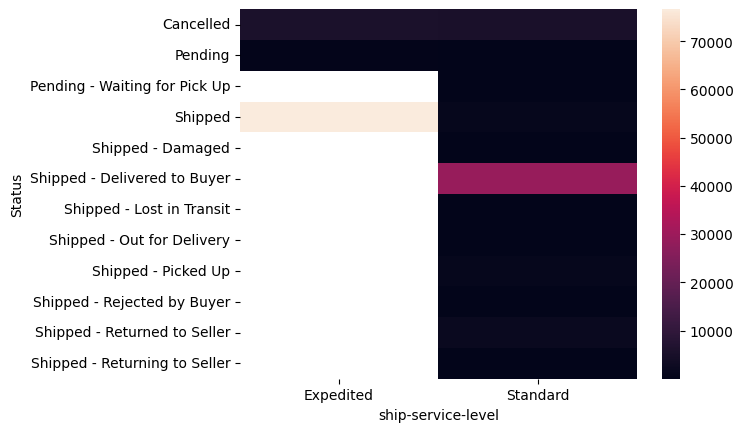

Axes(0.125,0.11;0.62x0.77)


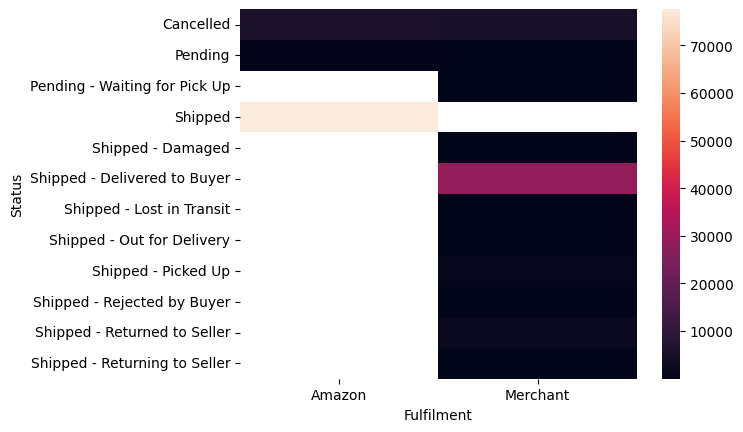

In [127]:
import streamlit as st
import plotly.express as px
import io

# Streamlit app
st.title("Interactive Dashboard")


plt.figure(figsize=(10, 6))
plt.xticks(fontsize=8, rotation=90)
sns.countplot(data= df2, x="Category")
plt.show()

#########################################################
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
india_sales.boundary.plot(ax=ax)
india_sales.plot(column='Amount', ax=ax, legend=True,
                 legend_kwds={'label': "Sales by Region",
                              'orientation': "horizontal"},
                 cmap='OrRd')

plt.title('Regional Sales Distribution in India')
plt.show()

############################################################
sns.lineplot(data= df2, x= "Qty", y= "Amount")
plt.show()
############################################################
status_rel("ship-service-level", "day", "count")
plt.show()
##############################################################
status_rel("Fulfilment", "day", "count")
plt.show()

In [128]:
df_cat = df2[["Qty","Amount","num_promotions", "Category"]]

In [129]:
group_by_cat = df_cat.groupby("Category").sum()

In [130]:
group_by_cat.sort_values(by = "Qty")

,Qty,Amount,num_promotions
Category,,,
Dupatta,3,915.00,3
Saree,152,123933.76,629
Bottom,397,150667.98,3380
Blouse,844,458408.18,4064
Ethnic Dress,1053,791217.66,5650
Top,9897,5346812.30,49360
Western Dress,13938,11215337.69,129374
kurta,44956,21291538.70,251363
Set,45214,39195176.03,272643


In [131]:
group_by_cat.sort_values(by = "Amount")

,Qty,Amount,num_promotions
Category,,,
Dupatta,3,915.00,3
Saree,152,123933.76,629
Bottom,397,150667.98,3380
Blouse,844,458408.18,4064
Ethnic Dress,1053,791217.66,5650
Top,9897,5346812.30,49360
Western Dress,13938,11215337.69,129374
kurta,44956,21291538.70,251363
Set,45214,39195176.03,272643


In [132]:
data_model.to_csv("/kaggle/working/input_data.csv")

[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=10; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=10; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=2, classifier__min_samples_split=2; total time=   0.8s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=2, classifier__min_samples_split=5; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=2, classifier__min_samples_split=10; total time=   0.7s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=4, classifier__min_samples_split=2; total time=   0.8s
[CV] END classifier__max_depth=3, classifier__min_sam